In [1]:
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast

print(nth_prime(400))

2741


In [1]:
def get_all_newforms_at_level(level, expansion_terms=30, output_file=None):
    """
    Get ALL weight 2 rational newforms at a specific level.
    Only takes one curve per isogeny class (since they give the same newform).
    """
    from sage.databases.cremona import CremonaDatabase
    import time
    
    start_time = time.time()
    db = CremonaDatabase()
    
    rational_forms = []
    
    print(f"Weight 2 rational newforms at level {level}")
    print(f"Computing {expansion_terms} terms\n")
    
    # Open output file if specified
    if output_file:
        f_out = open(output_file, 'w')
    
    try:
        curves = db.allcurves(level)
        
        if curves:
            # Group by isogeny class (the letter part)
            isogeny_classes = {}
            for label in curves.keys():
                # Extract the letter (isogeny class identifier)
                letter = ''.join([c for c in label if c.isalpha()])
                if letter not in isogeny_classes:
                    isogeny_classes[letter] = label
            
            print(f"Found {len(isogeny_classes)} distinct newforms (isogeny classes)\n")
            
            # Process one curve per isogeny class
            for letter in sorted(isogeny_classes.keys()):
                label = isogeny_classes[letter]
                full_label = f"{level}{label}"
                E = EllipticCurve(full_label)
                rational_forms.append((level, 2, E))
                
                # Print header to console
                print(f"\n{'='*70}")
                print(f"Newform {len(rational_forms)}: Isogeny class {level}{letter}")
                print(f"Representative curve: {full_label}")
                print(f"{'='*70}")
                
                # Get coefficients
                an_list = E.anlist(expansion_terms + 1)
                coeffs = an_list[1:]
                
                # Write to file
                if output_file:
                    f_out.write(f"Isogeny class: {level}{letter}\n")
                    f_out.write(f"Representative curve: {full_label}\n")
                    f_out.write(f"Coefficients a_1 to a_{expansion_terms}:\n")
                    f_out.write(str(coeffs) + "\n\n")
                
                # Show first 10 coefficients to console
                print(f"Coefficients (first 10 of {expansion_terms}):")
                print(f"  a_1-a_10: {coeffs[:10]}")
                
                # Additional info
                print(f"\nCurve info:")
                print(f"  Conductor: {E.conductor()}")
                print(f"  Rank: {E.rank()}")
                
                if output_file:
                    f_out.write(f"Conductor: {E.conductor()}\n")
                    f_out.write(f"Rank: {E.rank()}\n")
                    f_out.write(f"{'='*70}\n\n")
    
    except Exception as e:
        print(f"Error at level {level}: {e}")
    
    if output_file:
        f_out.close()
        print(f"\nFull data written to: {output_file}")
    
    elapsed = time.time() - start_time
    print(f"\n{'='*70}")
    print(f"Found {len(rational_forms)} distinct newforms in {elapsed:.2f} seconds")
    print(f"{'='*70}")
    
    return rational_forms


results = get_all_newforms_at_level(
    level=21,
    expansion_terms=2800,
    output_file="/Users/barrybrent/data2/run27feb26no1.txt"
)

Weight 2 rational newforms at level 21
Computing 2800 terms

Found 1 distinct newforms (isogeny classes)


Newform 1: Isogeny class 21a
Representative curve: 21a1
Coefficients (first 10 of 2800):
  a_1-a_10: [1, -1, 1, -1, -2, -1, -1, 3, 1, 2]

Curve info:
  Conductor: 21
  Rank: 0

Full data written to: /Users/barrybrent/data2/run27feb26no1.txt

Found 1 distinct newforms in 1.71 seconds


In [2]:
# loads all forms at a given level one at a time converted to lists
def load_newforms_from_file(filename):
    """
    Load all newforms from a file and return them as a list of dictionaries.
    Each dictionary contains the label and coefficients.
    """
    with open(filename, 'r') as f:
        content = f.read()
    
    # Split by the separator line
    blocks = content.split('='*70)
    
    newforms = []
    
    for block in blocks:
        if 'Isogeny class:' in block:
            lines = block.strip().split('\n')
            
            # Extract isogeny class
            isogeny_class = lines[0].replace('Isogeny class:', '').strip()
            
            # Extract representative curve
            rep_curve = lines[1].replace('Representative curve:', '').strip()
            
            # Find the coefficients line
            for i, line in enumerate(lines):
                if line.startswith('['):
                    coeffs = eval(line)
                    break
            
            newforms.append({
                'isogeny_class': isogeny_class,
                'representative': rep_curve,
                'coefficients': coeffs
            })
    
    return newforms

# Load all newforms
newforms = load_newforms_from_file("/Users/barrybrent/data2/run27feb26no1.txt")
print("curve 21a1")
print(f"Loaded {len(newforms)} newforms\n")
print("number of newforms:",len(newforms))
# Access them one at a time
for i, form in enumerate(newforms):
    print(f"Newform {i+1}:")
    print(f"  Isogeny class: {form['isogeny_class']}")
    print(f"  Representative: {form['representative']}")
    print(f"  First 10 coefficients: {form['coefficients'][:10]}")
    print(f"  Total coefficients: {len(form['coefficients'])}")
    print()

# Access individual newforms
newform_1 = newforms[0]['coefficients']  # First newform
#newform_2 = newforms[1]['coefficients']  # Second newform (if it exists)

print(f"Newform 1, coefficient of q^5: {newform_1[4]}")  # Remember: index 4 is a_5
print(newform_1[:10])

def curve_twentyone_prime(n):
    return newform_1[nth_prime(n)]

import pickle
curve_twentyone_prime_list=[curve_twentyone_prime(n) for n in range(1,401)]
with open('/Users/barrybrent/data2/run27feb26no2.txt', 'wb') as wfile:
    pickle.dump(curve_twentyone_prime_list, wfile) 


curve 21a1
Loaded 1 newforms

number of newforms: 1
Newform 1:
  Isogeny class: 21a
  Representative: 21a1
  First 10 coefficients: [1, -1, 1, -1, -2, -1, -1, 3, 1, 2]
  Total coefficients: 2801

Newform 1, coefficient of q^5: -2
[1, -1, 1, -1, -2, -1, -1, 3, 1, 2]


In [3]:
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast

with open('/Users/barrybrent/data2/run27feb26no2.txt', 'rb') as rfile:
    curve_twentyone_prime_list = pickle.load(rfile)



h_list=[1]+curve_twentyone_prime_list # h_0 = 1 required by the lemmas
j_list=[(0,1)] # first entry is just an offset. 
for n in range(1,401):# so j(1) = 1 = h(0) as required.
    sm=0
    for r in [1..n-1]: 
        sm=sm+j_list[r][1]*h_list[n-r] 
    j_n=n*h_list[n]-sm
    print((n,j_n))
    j_list.append((n,j_n))
    
with open('/Users/barrybrent/data2/run27feb26no3.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) 

(1, 1)
(2, -3)
(3, 1)
(4, 9)
(5, -19)
(6, 45)
(7, -69)
(8, 89)
(9, -26)
(10, -93)
(11, 386)
(12, -963)
(13, 1548)
(14, -2145)
(15, 1676)
(16, 921)
(17, -7377)
(18, 19278)
(19, -35681)
(20, 51659)
(21, -50847)
(22, 5948)
(23, 126064)
(24, -387379)
(25, 784681)
(26, -1225240)
(27, 1400140)
(28, -688385)
(29, -1904661)
(30, 7531200)
(31, -16812074)
(32, 28349241)
(33, -36244702)
(34, 27159843)
(35, 21743696)
(36, -140095242)
(37, 351158750)
(38, -640245017)
(39, 898826865)
(40, -849122781)
(41, -22241802)
(42, 2446007343)
(43, -7133116790)
(44, 14125757996)
(45, -21554727316)
(46, 23803898780)
(47, -9591242200)
(48, -38523374403)
(49, 140215441409)
(50, -304465443793)
(51, 502528760679)
(52, -624670394612)
(53, 428667651012)
(54, 490356837018)
(55, -2644331464519)
(56, 6404041877623)
(57, -11424958198238)
(58, 15654013062401)
(59, -14017623076671)
(60, -2653035241228)
(61, 47105307811607)
(62, -131131677326582)
(63, 253682792230359)
(64, -378609463444167)
(65, 402513446000023)
(66, -12257

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
MINIMUM MODULI


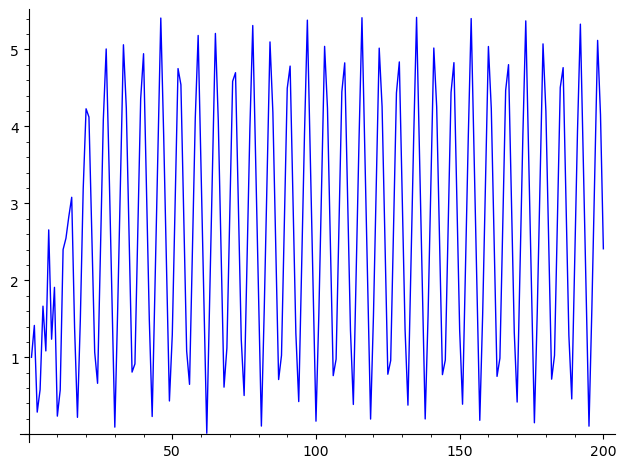

LOGS MINIMUM MODULI


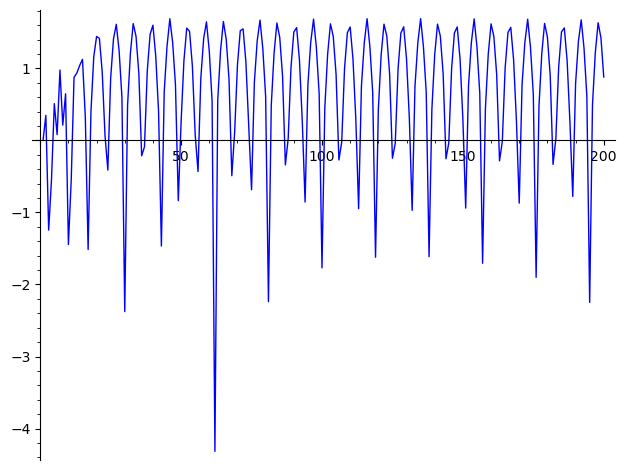

In [4]:
import pickle
from sage.all import sigma, nth_prime
import ast


with open('/Users/barrybrent/data2/run27feb26no3.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
    
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable

charpol_list=[]
roots_list=[]

mins_list=[]
log_mins_list=[]

dets=[]

for n in range(1, 201):
    print(n)
    deformed_j_list=j_list[:n]
    inputs=[pair[1] for pair in deformed_j_list]
    pl=P_matrix(inputs) 
    det=pl.det()
    dets.append((n,det))
    cp=pl.charpoly()
    charpol_list.append((n,cp))
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
            log_mins_list.append((n,log_minn))
        


p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()

p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()


with open('/Users/barrybrent/data2/run27feb26no4.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run27feb26no5.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run27feb26no6.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run27feb26no7.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped
    
with open('/Users/barrybrent/data2/run27feb26no8.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) #output snipped


